In [1]:
cd 13510

In [2]:
punlearn pathfinder
plist pathfinder
/bin/rm -rf pathfinder
mkdir pathfinder


Parameters for /home/kjg/cxcds_param4/pathfinder.par

        infile =                  Input image
       outfile =                  Output map image
       (minval = 0)               Minimum pixel value to consider in input image.
    (direction = diagonal)        Directions to follow gradient
     (debugreg = )                Diagnostic region file
      (verbose = 1)               Tool chatter level
      (clobber = no)              Remove output file if it already exists?
         (mode = ql)              



In [3]:
aconvolve img.fits pathfinder/img.sm "lib:gaus(2,5,5,5,5)" meth=slide edge=const const=0 clob+

In [4]:
time pathfinder \
  infile=pathfinder/img.sm \
  outfile=pathfinder/pf.map \
  minval=0.1 \
  direction=diagonal \
  debugreg=pathfinder/pf.reg\
  mode=h clob+

pathfinder
          infile = pathfinder/img.sm
         outfile = pathfinder/pf.map
          minval = 0.1
       direction = diagonal
        debugreg = pathfinder/pf.reg
         verbose = 1
         clobber = yes
            mode = h


real	0m32.444s
user	0m32.113s
sys	0m0.316s


In [5]:
dmimggrad pathfinder/pf.map pathfinder/pf.grad sobel mag clob+

In [6]:
dmmaskbin pathfinder/img.sm pathfinder/pf.map pathfinder/pf.img clob+ 

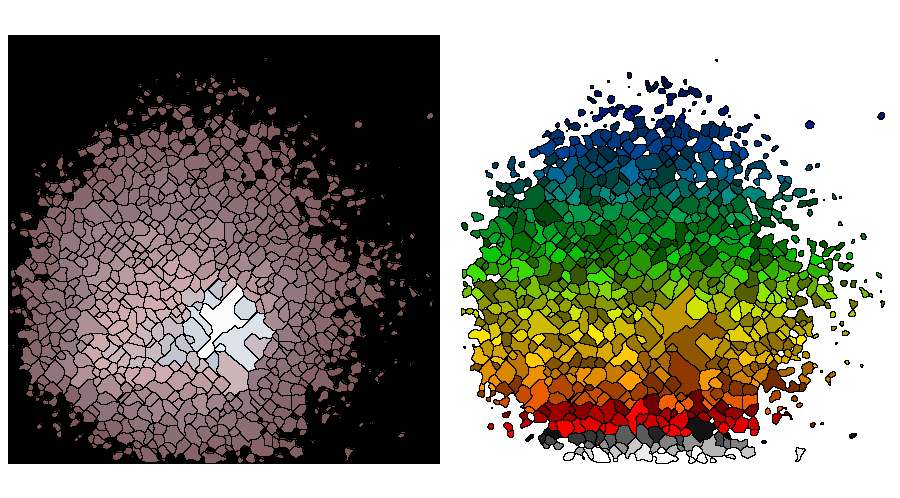

In [7]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  pathfinder/pf.img -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask pathfinder/pf.grad -nomask \
  -region select all -region color black -region select none \
  -block to 2 \
  pathfinder/pf.map -scale linear \
  -region delete all \
  -mask color black -mask pathfinder/pf.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png pathfinder/pf.abin.png -quit

display < pathfinder/pf.abin.png

ds9 -scale log -bin to 2 \
  -view colorbar no -view info no -view panner no -view magnifier no \
   pathfinder/img.sm \
  -cmap load sunset-in-atlantis.sao \
  -region pathfinder/pf.reg \
  -region select all -region color black -region select none 

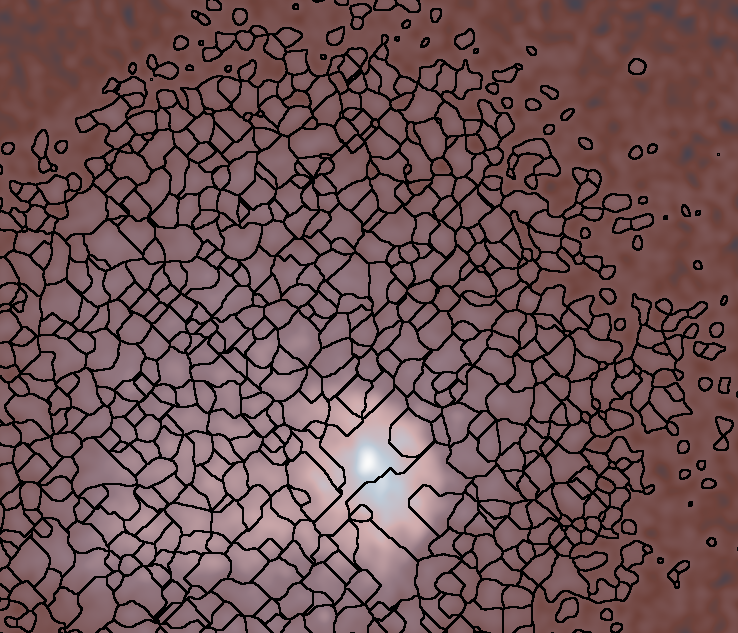

In [8]:
ds9  \
  -view colorbar no -view info no -view panner no -view magnifier no \
  pathfinder/img.sm -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask pathfinder/pf.grad -nomask \
  -region select all -region color black -region select none \
  -saveimage png pathfinder/img.sm.pf.png -exit

display < pathfinder/img.sm.pf.png


In [9]:
punlearn dmimgadapt
dmimgadapt \
  img.fits pathfinder/pf.asm \
  gaus 1 30 60 linear counts=100 \
  mode=h clob+

In [10]:
time pathfinder \
  infile=pathfinder/pf.asm \
  outfile=pathfinder/pf.asm.map \
  minval=0.1 \
  direction=diagonal \
  mode=h clob+

pathfinder
          infile = pathfinder/pf.asm
         outfile = pathfinder/pf.asm.map
          minval = 0.1
       direction = diagonal
        debugreg = 
         verbose = 1
         clobber = yes
            mode = h


real	1m11.914s
user	1m11.539s
sys	0m0.344s


In [11]:
dmimggrad pathfinder/pf.asm.map pathfinder/pf.asm.grad sobel mag clob+

In [12]:
dmmaskbin pathfinder/img.sm pathfinder/pf.asm.map pathfinder/pf.asm.img clob+ 

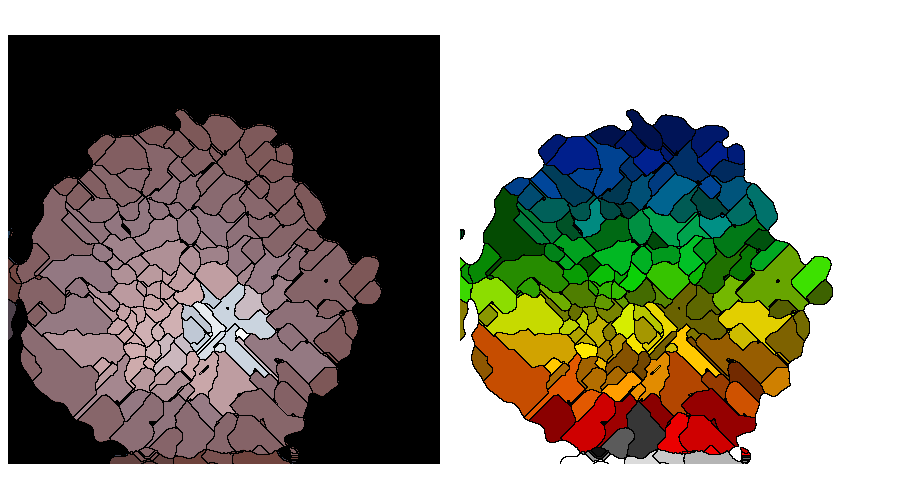

In [13]:
ds9 -geometry 900x600 \
  -view colorbar no -view info no -view panner no -view magnifier no \
  pathfinder/pf.asm.img -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask pathfinder/pf.asm.grad -nomask \
  -region select all -region color black -region select none \
  -block to 2 \
  pathfinder/pf.asm.map -scale linear \
  -region delete all \
  -mask color black -mask pathfinder/pf.asm.grad -nomask \
  -cmap load $ASCDS_CONTRIB/data/16_ramps.lut \
  -block to 1 -zoom to 0.5 \
  -tile column \
  -saveimage png pathfinder/pf.asm.abin.png -quit

display < pathfinder/pf.asm.abin.png

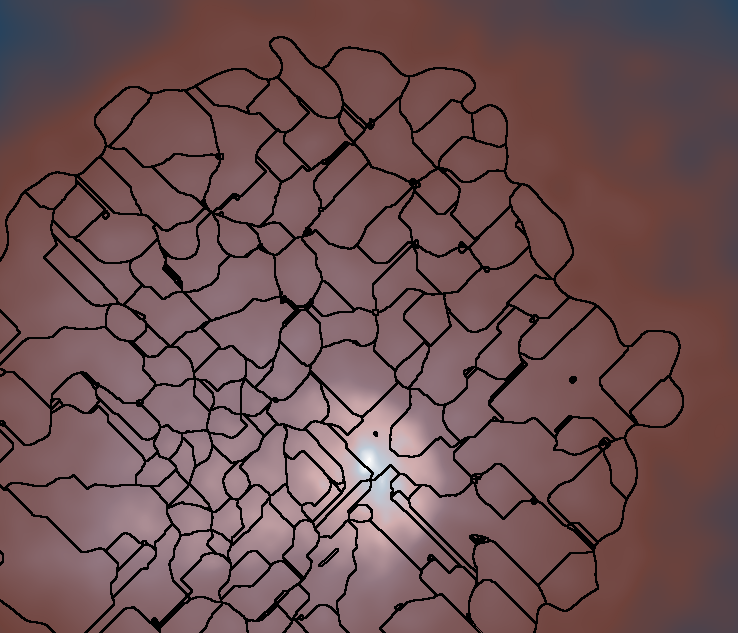

In [14]:
ds9  \
  -view colorbar no -view info no -view panner no -view magnifier no \
  pathfinder/pf.asm -scale log \
  -cmap load sunset-in-atlantis.sao \
  -mask color black -mask pathfinder/pf.asm.grad -nomask \
  -region select all -region color black -region select none \
  -saveimage png pathfinder/pf.asm.pf.png -exit

display < pathfinder/pf.asm.pf.png
